In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/default of credit card clients.xls
/kaggle/input/credit-card-clients/Copy of default of credit card clients.xls


In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel("/kaggle/input/credit-card-clients/Copy of default of credit card clients.xls")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [7]:
df.iloc[1:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# EDA (Exploratory Data Analysis)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.shape

(30000, 25)

In [10]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<Axes: >

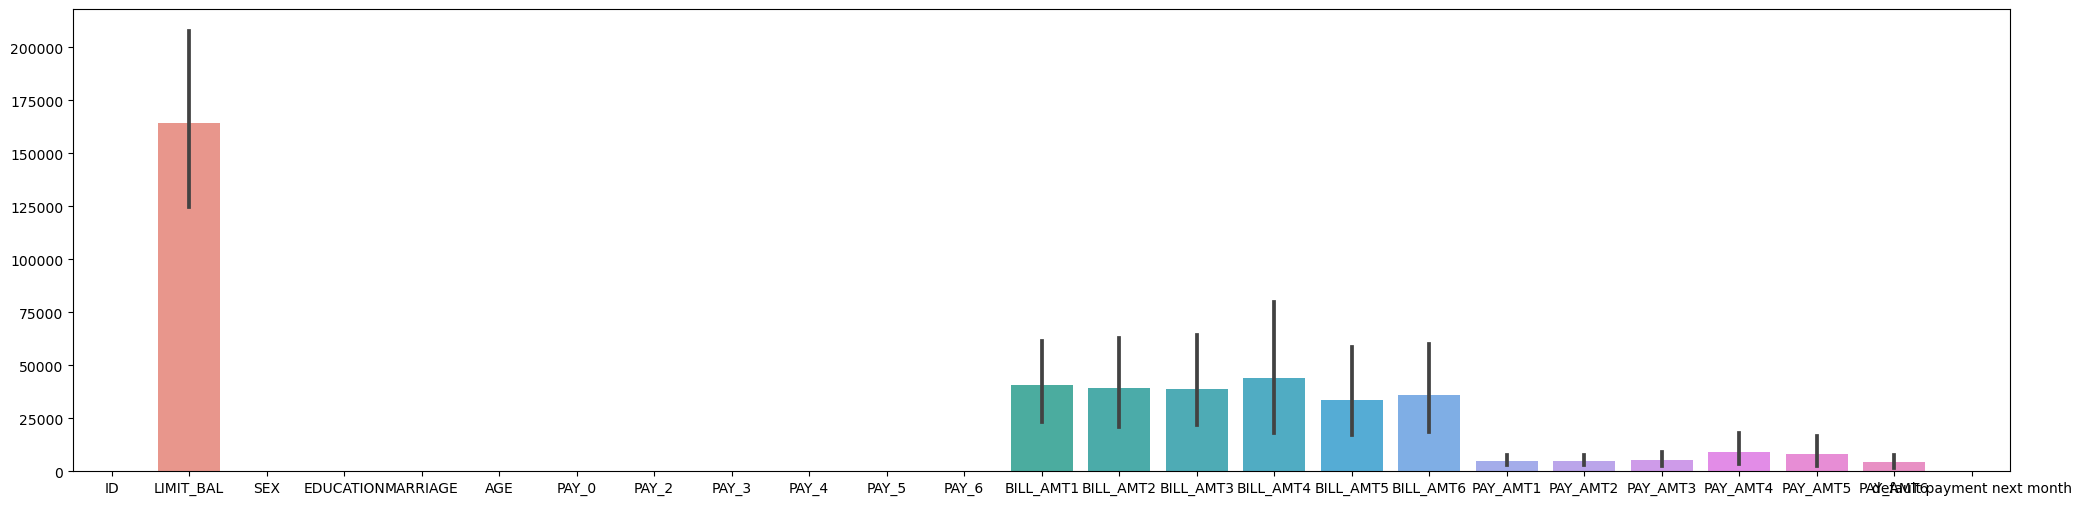

In [12]:
plt.figure(figsize=(25,6))
sns.barplot(df[:50])

In [13]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

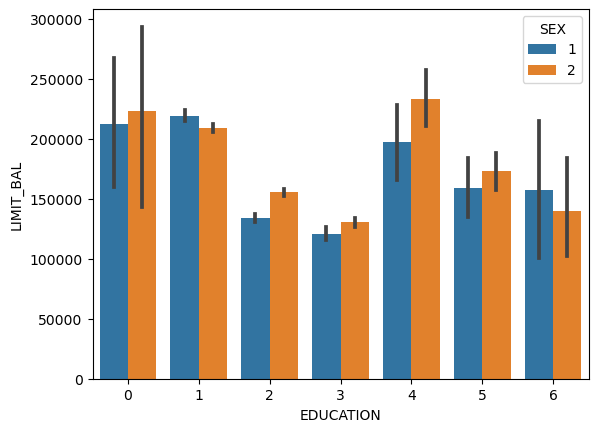

In [14]:
sns.barplot(x=df['EDUCATION'],y=df['LIMIT_BAL'],hue=df['SEX'])

<Axes: xlabel='EDUCATION', ylabel='count'>

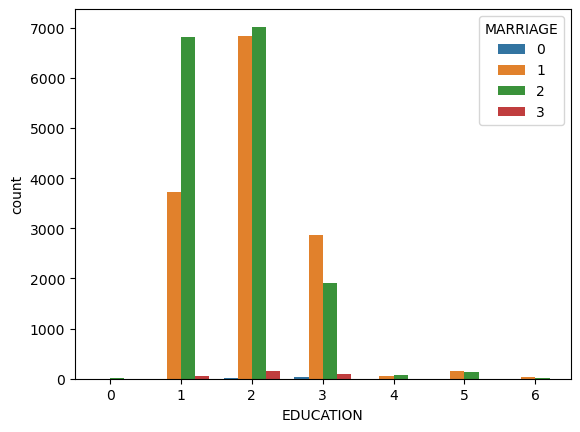

In [15]:
sns.countplot(x=df['EDUCATION'],hue=df['MARRIAGE'])

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

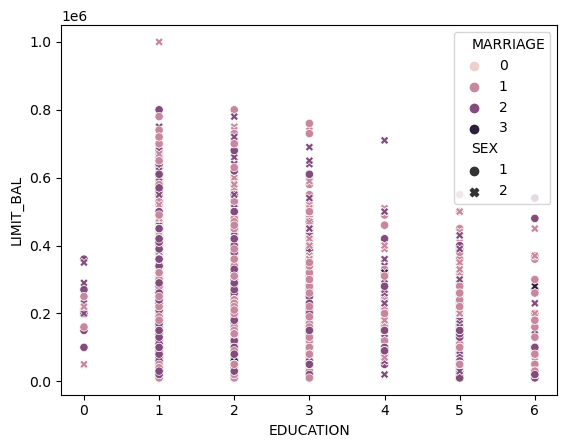

In [16]:
sns.scatterplot(x=df['EDUCATION'],y=df['LIMIT_BAL'],hue=df['MARRIAGE'],style=df['SEX'])

<Axes: >

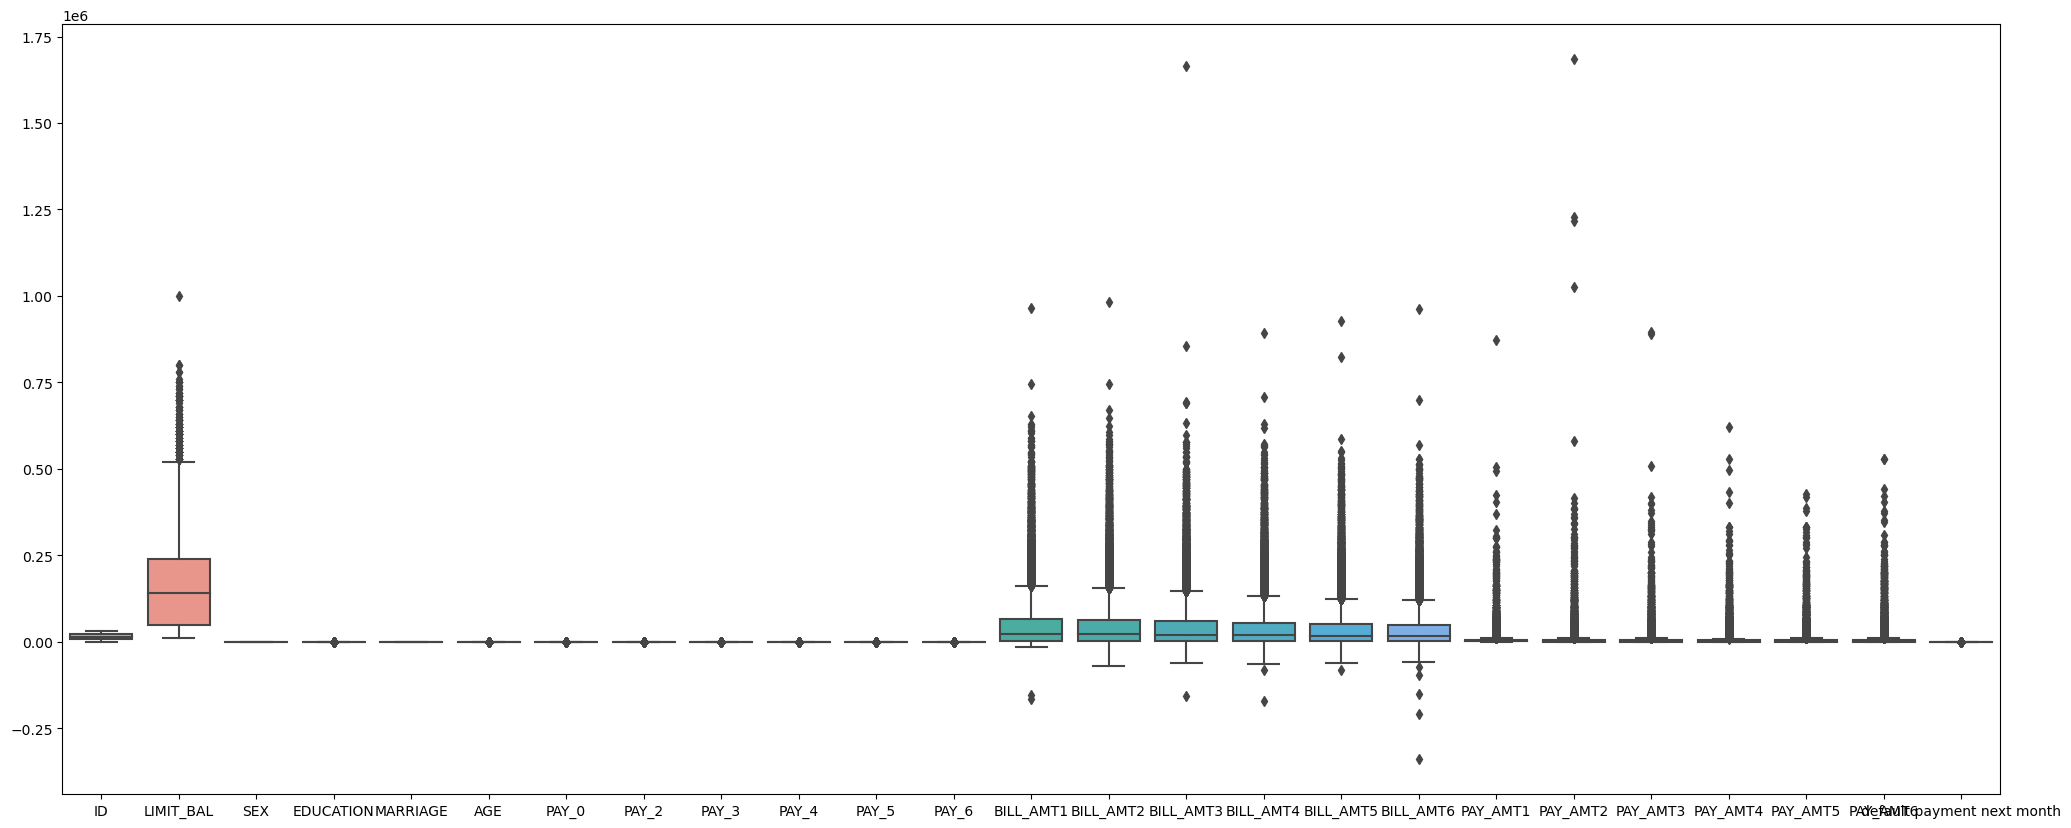

In [17]:
plt.figure(figsize=(25,10))
sns.boxplot(df)

In [18]:
X=df.drop(columns="default payment next month")
y=df["default payment next month"]

In [19]:
##spliting the datasets into train and test 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
lr=LinearRegression()
Rl=Ridge(alpha=2.5)
Ll=Lasso(alpha=2.5)
El=ElasticNet(alpha=2.0,l1_ratio=0.9)

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred_lr=lr.predict(X_test)

In [24]:
lr_score=r2_score(y_test,y_pred_lr)

In [25]:
Rl.fit(X_train,y_train)

Ridge(alpha=2.5)

In [26]:
y_pred_rl=Rl.predict(X_test)

In [27]:
rl_score=r2_score(y_test,y_pred_rl)

In [28]:
Ll.fit(X_train,y_train)

Lasso(alpha=2.5)

In [29]:
y_pred_ll=Ll.predict(X_test)
y_pred_ll

array([0.2959184 , 0.24287622, 0.288214  , ..., 0.27218938, 0.25544915,
       0.16746434])

In [30]:
ll_score=r2_score(y_test,y_pred_ll)

In [31]:
El.fit(X_train,y_train)

ElasticNet(alpha=2.0, l1_ratio=0.9)

In [32]:
y_pred_el=El.predict(X_test)

In [33]:
el_score=r2_score(y_test,y_pred_el)

In [34]:
d={
    'Model Name':['Linear Regression','Ridge Regression','Lasso Regression','ElasticNet Regression'],
    'Score':[lr_score,rl_score,ll_score,el_score]
}

In [35]:
pd.DataFrame(d)

,Model Name,Score
0,Linear Regression,0.115293
1,Ridge Regression,0.115293
2,Lasso Regression,0.031354
3,ElasticNet Regression,0.031362
